<h1>Lab 05: Finding Structure in Time</h1>

<h2>CS371: Cognitive Science<br>
Bryn Mawr College, Fall 2016<br>
Prof. Blank
</h2>

This is a team-based project.

In the cell below, add your by-line, and delete this cell:

# 1. Predicting the next word

In this lab we will attempt to replicate the results from "Finding Structure in Time":

https://crl.ucsd.edu/~elman/Papers/fsit.pdf

First, we need some text. For this demo, I'll make up a short text. For your assignment, you should generate sentences like Elman did in his paper. You should write a program that will generate random sentences of the appropriate grammar.

In [218]:
text = ("me like you you like me me like apples me like bananas "
        "you like bananas you like apples you hate berries me "
        "like berries me need berries you need apples you need me").strip()

Next, we write some encoding and decoding functions:

In [219]:
text_words = text.split(" ")

words = list(set(text_words))

def encode(word):
    index = words.index(word)
    binary = [0] * len(words)
    binary[index] = 1
    return binary

def decode(pattern):
    winner = max(pattern)
    index = list(pattern).index(winner)
    return label(index)

def label(index):
    for word, pattern in patterns.items():
        if pattern[index] == 1:
            return word
    return None


# Reset to max length:
pattern_size = len(encode(words[0]))

patterns = {word: encode(word) for word in words}

text_words is the text corpus, as a list of words. Your's will be too long to display here.

In [220]:
text_words

['me',
 'like',
 'you',
 'you',
 'like',
 'me',
 'me',
 'like',
 'apples',
 'me',
 'like',
 'bananas',
 'you',
 'like',
 'bananas',
 'you',
 'like',
 'apples',
 'you',
 'hate',
 'berries',
 'me',
 'like',
 'berries',
 'me',
 'need',
 'berries',
 'you',
 'need',
 'apples',
 'you',
 'need',
 'me']

In [221]:
words

['berries', 'need', 'me', 'apples', 'like', 'bananas', 'you', 'hate']

In [222]:
patterns.keys()

dict_keys(['berries', 'bananas', 'need', 'you', 'me', 'like', 'hate', 'apples'])

Testing our encoding and decoding functions:

In [223]:
encode("need")

[0, 1, 0, 0, 0, 0, 0, 0]

In [224]:
decode(encode("need"))

'need'

In [247]:
decode([0, 0.6, 0.5, 0, 0.1, 0, 0, 0])

'need'

In [229]:
label(1)

'need'

And now, we explore reading through a text, predicting what word comes next.

In [230]:
from conx import SRN

class Predict(SRN):
    def initialize_inputs(self):
        pass

    def inputs_size(self):
        # Return the number of inputs:
        return len(text_words)

    def get_inputs(self, i):
        current_word = text_words[i]
        next_word = text_words[(i + 1) % len(text_words)]
        return (patterns[current_word], patterns[next_word])

In [231]:
net = Predict(len(encode("need")), 5, len(encode("need")))

In [232]:
net.train(max_training_epochs=2000,
          report_rate=100,
          tolerance=0.3,
          epsilon=0.1)

--------------------------------------------------
Training for max trails: 2000 ...
Epoch: 0 TSS error: 101.397531278 %correct: 0.0
Epoch: 100 TSS error: 21.0288009846 %correct: 0.0
Epoch: 200 TSS error: 17.6554494885 %correct: 0.18181818181818182
Epoch: 300 TSS error: 14.6845872245 %correct: 0.30303030303030304
Epoch: 400 TSS error: 12.045306326 %correct: 0.36363636363636365
Epoch: 500 TSS error: 10.2342781218 %correct: 0.3939393939393939
Epoch: 600 TSS error: 9.24119739812 %correct: 0.48484848484848486
Epoch: 700 TSS error: 8.25721892617 %correct: 0.5151515151515151
Epoch: 800 TSS error: 7.19393364174 %correct: 0.5454545454545454
Epoch: 900 TSS error: 6.36376877071 %correct: 0.6363636363636364
Epoch: 1000 TSS error: 5.89511765761 %correct: 0.696969696969697
Epoch: 1100 TSS error: 5.55586028248 %correct: 0.696969696969697
Epoch: 1200 TSS error: 4.87985305528 %correct: 0.696969696969697
Epoch: 1300 TSS error: 4.19677499327 %correct: 0.7272727272727273
Epoch: 1400 TSS error: 3.75729352

And testing the trained network. You may have to train an amount comparable to what Elman did.

In [233]:
net.test()

--------------------------------------------------
Test:
******************************
Input : [0, 0, 1, 0, 0, 0, 0, 0]
Output: [  2.11047114e-02   1.05353114e-03   1.51418711e-02   1.19526865e-05
   8.90758773e-01   1.76233384e-04   2.73609951e-03   9.97449915e-04] 
Target: [0, 0, 0, 0, 1, 0, 0, 0] Correct
******************************
Input : [0, 0, 0, 0, 1, 0, 0, 0]
Output: [  1.68494595e-01   5.12335672e-07   2.80982943e-03   3.66894766e-01
   5.04145564e-02   1.01438571e-01   3.87937518e-01   2.34307921e-03] 
Target: [0, 0, 0, 0, 0, 0, 1, 0] Incorrect
******************************
Input : [0, 0, 0, 0, 0, 0, 1, 0]
Output: [  2.49153116e-03   4.51391506e-06   6.51019511e-04   2.87403159e-05
   2.20248631e-02   1.04906100e-04   5.16446136e-01   1.33050121e-03] 
Target: [0, 0, 0, 0, 0, 0, 1, 0] Incorrect
******************************
Input : [0, 0, 0, 0, 0, 0, 1, 0]
Output: [  7.63738588e-03   7.70121481e-05   5.42627790e-05   1.82421577e-02
   9.99785179e-01   3.71534302e-06   3.

That is hard to read. conx comes with a way to override the display of the test input:

In [234]:
net.display_test_input = lambda inputs: print("Input:   " + decode(inputs))

In [235]:
net.test()

--------------------------------------------------
Test:
******************************
Input:   me
Output: [  2.19249592e-02   1.17853572e-03   1.51508181e-02   1.17684923e-05
   8.80658274e-01   1.78081640e-04   2.75980500e-03   1.02082983e-03] 
Target: [0, 0, 0, 0, 1, 0, 0, 0] Correct
******************************
Input:   like
Output: [  1.68633200e-01   5.37501743e-07   2.67303674e-03   3.83480112e-01
   5.36311967e-02   9.12961568e-02   3.90337956e-01   2.49953788e-03] 
Target: [0, 0, 0, 0, 0, 0, 1, 0] Incorrect
******************************
Input:   you
Output: [  2.16347056e-03   4.82952415e-06   8.08335137e-04   2.89122275e-05
   2.06314123e-02   1.06524202e-04   4.95778876e-01   1.15916079e-03] 
Target: [0, 0, 0, 0, 0, 0, 1, 0] Incorrect
******************************
Input:   you
Output: [  9.61742864e-03   6.69739761e-05   4.38371364e-05   1.83955093e-02
   9.99758159e-01   3.91596066e-06   5.33965782e-03   8.75034860e-02] 
Target: [0, 0, 0, 0, 1, 0, 0, 0] Correct
*******

That is better. But we can also do the same for displaying the outputs:

In [236]:
def display_outputs(outputs, result="Outputs", label=None): 
    print(result + ": " + decode(outputs))

In [237]:
net.display_test_output = display_outputs

In [238]:
net.test()

--------------------------------------------------
Test:
******************************
Input:   me
Outputs: like
Correct: like
******************************
Input:   like
Outputs: you
Incorrect: you
******************************
Input:   you
Outputs: you
Incorrect: you
******************************
Input:   you
Outputs: like
Correct: like
******************************
Input:   like
Outputs: me
Correct: me
******************************
Input:   me
Outputs: me
Incorrect: me
******************************
Input:   me
Outputs: like
Correct: like
******************************
Input:   like
Outputs: you
Incorrect: apples
******************************
Input:   apples
Outputs: me
Correct: me
******************************
Input:   me
Outputs: like
Correct: like
******************************
Input:   like
Outputs: bananas
Correct: bananas
******************************
Input:   bananas
Outputs: you
Correct: you
******************************
Input:   you
Outputs: like
Correct: like
***

Better! Why is it that sometimes the "output" may be the same as "correct" but still marked as "Incorrect"?

# 2. Analysis

Elman produced "dendograms" (tree plots) to show similarity of the hidden activations associated with each word. We can do the same.

In [239]:
%matplotlib inline
import io
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial import distance

We will plot the hidden unit activations of how close each hidden pattern is to each other. This is a way of seeing the clustering among numeric representations of many dimensions. 

To do this, we need to get the "hidden layer activations" for each word, in a proper order.

In [240]:
net.layer[0].propagate(encode("need"))

array([ 0.94643207,  0.02253122,  0.75723384,  0.03539211,  0.99686973])

Next, we will go through the words in the text, and get the hidden layer activations.

Note that each time, we are overwriting the previous activations. A better method would be to somehow average each set of hidden layer activations.

In [241]:
hiddens_dict = {}
for word in text_words:
    hiddens_dict[word] = net.layer[0].propagate(patterns[word])

Next, we get those hidden layer activations in the order that matches the "words" list:

In [242]:
hiddens = []
for word in words:
    hiddens.append(hiddens_dict[word])

Now, we are ready to process the hidden layer activations to display as a dendrogram. 

http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [243]:
linkage = hierarchy.linkage(hiddens)

Let's make the output big enough to easily see (units are based on DPI):

In [244]:
plt.rcParams["figure.figsize"] = (13, 5)

In [245]:
threshold = 0.3
clusters = hierarchy.fcluster(linkage, threshold, criterion="distance")

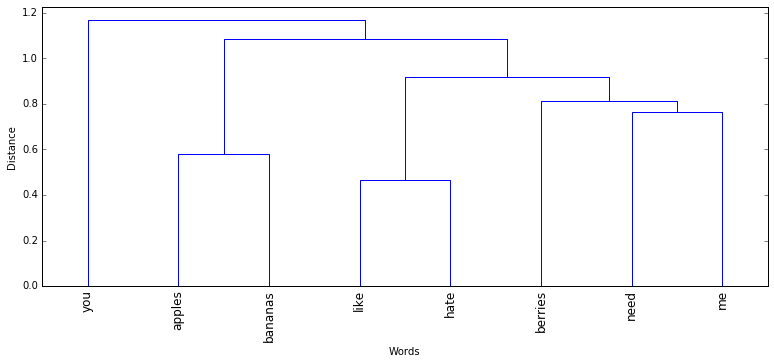

In [246]:
hierarchy.dendrogram(linkage, color_threshold=0.3, leaf_label_func=label, leaf_rotation=90)
plt.xlabel("Words")
plt.ylabel("Distance")

You may want to explore the options for the dendrogram here:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

# 3. Team Reflections

Write about what you have found. You can write much here. You can explain the experiment, results found, where they agree with Elman, or disagree with his results.

# 4. Reflections

As per usual, please reflect deeply on this week's lab. What was challenging, easy, or surprising? Connect the topics onto what you already know.